<a href="https://colab.research.google.com/github/ranaabi/Assignment10_Python/blob/main/Assignment%2011_Rana%20Abi%20Prasuma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [29]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [30]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("dataset")
data = []
labels = []

[INFO] loading images...


In [31]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [32]:
print(labels)

['GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08',

In [33]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [34]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]]


In [35]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(1055, 64, 64, 3)
(352, 64, 64, 3)


In [36]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
model1.add(Convolution2D(64, (3,3), activation='relu'))
model1.add(MaxPooling2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

In [37]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64*64*3,)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "sigmoid", name="layer4"),
    ]
)

In [38]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 1,230,873
Trainable params: 1,230,873
Non-trainable params: 0
_________________________________________________________________


In [39]:
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [41]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25


ValueError: ignored

In [42]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

NameError: ignored

In [43]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_01       0.09      1.00      0.17        33
      GMB_02       0.00      0.00      0.00        20
      GMB_03       0.00      0.00      0.00        29
      GMB_04       0.00      0.00      0.00        38
      GMB_05       0.00      0.00      0.00        27
      GMB_06       0.00      0.00      0.00        25
      GMB_07       0.00      0.00      0.00        27
      GMB_08       0.00      0.00      0.00        29
      GMB_09       0.00      0.00      0.00        34
      GMB_10       0.00      0.00      0.00        35
      GMB_11       0.00      0.00      0.00        27
      nonGMB       0.00      0.00      0.00        28

    accuracy                           0.09       352
   macro avg       0.01      0.08      0.01       352
weighted avg       0.01      0.09      0.02       352



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
model.save('nnmodel_scene')

INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [45]:
import cv2
import matplotlib.pyplot as plt
image1='GMB_test.jpg'

TypeError: ignored

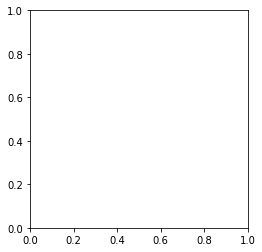

In [46]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))